# Исследование объявлений о продаже квартир

**Цель** проекта - изучить параметры объявлений о продаже квартир для того, чтобы в дальнейшем построить автоматизированную систему, отслеживающую аномалии и мошенническую деятельность.  
Датасет - данные об объявлениях о продажах квартир в Санкт-Петербурге и ближайших к нему населенных пунктах. Основные интересующие нас параметры:
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- floor — этаж
- last_price — цена на момент снятия с публикации
- locality_name — название населённого пункта
- rooms — число комнат
- total_area — площадь квартиры в квадратных метрах (м²)  

План проекта:
1. <a href="#Изучение-данных">Изучить данные</a>
2. <a href="#Предобработка-данных">Обработать данные</a>
3. <a href="#Рассчет-и-добавление-в-таблицу-дополнительных-параметров">Посчитать и добавить дополнительные данные</a>
4. <a href="#Проведение-исследовательского-анализа-данных">Исследовать данные</a>
5. <a href="#Общий-вывод">Составить вывод</a>

### Изучение данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

#### Вывод

Первый взгляд на данные показал, что необходимо:
1. Обработать пропуски в столбцах:
    - ceiling_height
    - floors_total
    - living_area
    - is_apartment
    - kitchen_area
    - balcony
    - locality_name
    - airports_nearest
    - city_centers_nearest
    - parks_around3000
    - parks_nearest
    - ponds_around3000
    - ponds_nearest
    - days_exposition 
2. Заменить тип значения в столбцах:
    - last_price
    - first_day_exposition
    - floors_total
    - is_apartment
    - balcony
    - days_exposition
3. Проверить данные на наличие выбивающихся значений
4. Проверить данные на наличие дубликатов

### Предобработка данных

Приведем название столбца с расстоянием до центра города к общему виду.

In [4]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

#### Обработка пропусков

Список столбцов, в которых обнаружены пропуски:
- ceiling_height
- floors_total
- living_area
- is_apartment
- kitchen_area
- balcony
- locality_name
- airports_nearest
- city_centers_nearest
- parks_around3000
- parks_nearest
- ponds_around3000
- ponds_nearest
- days_exposition  

Для начала уберем из этого списка те столбцы, в которых заполнение пропусков проводиться не будет.  

В столбце ceiling_height довольно много пропусков, однако данных, которые могли бы нам помочь при заполнении этих пропусков нет. Высота потолков зависит от типа (плана/серии) дома, а эта информация у нас не указана. Поэтому оставим пропуски.

Если посмотреть на количество пропусков в столбцах airports_nearest, city_centers_nearest, parks_around3000, ponds_around3000 то можно заметить, что количество пропусков в них почти одинаково. Учитывая, что эти данные собираются системой автоматически, делаем предположение, что система просто по какой-то причине не собрала эти данные.  
Обнаружить закономерность в этих пропусках не удалось, а замена на медианные или средние значения может сильно повлиять на достоверность данных.  
Также детальнее рассмотрим пары столбцов parks_around3000 - parks_nearest и ponds_around3000 - ponds_nearest. 
Столбы parks/ponds_around3000 принимают значения трёх видов: 0, NaN или нормальное число. Пропусками в этих столбцах являются только NaN'ы. 
Пропуски в столбцах parks/ponds_nearest соответствуют значениям 0 и NaN столбцов parks/ponds_around3000. 

Заменить пропуски в названиях населенных пунктов будет тоже сложно. Так как пропусков в столбце locality_name очень мало, можно просто удалить строки с пропуском в этом столбце.  

Строки с пропусками в столбце floor_total тоже просто удалим.  

В итоге список столбцов, в которых необходимо заполнить пропуски сокращается до:
- living_area
- is_apartment
- kitchen_area
- balcony
- days_exposition  

Позволю себе заметить, что, возможно, стоило бы вообще не заполнять пропуски, а просто брать подходящий для определенной задачи срез. Данных всё равно достаточно, а заполнение пропусков может исказить картину.

#### Обработка пропусков в столбце living_area 

Посмотрим на строки, в которых пропущена жилая площадь квартиры.

In [5]:
data[data['living_area'].isna()].head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.5,5.0,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN


Выведем информацию о значениях в столбце living_area. Пропусков в данном достаточно столбце много, закономерность пропусков установить не удалось. 

In [6]:
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Просто заменить на медиану - плохая идея, так как будут возникать ситуации, в которых жилая площадь превышает общую.  
Чтобы этого избежать найдем средний процент жилой площади от общей и будем заполнять пропуски в соответствии с этим соотношением.

In [7]:
mean_percent = (data['living_area'] / data['total_area']).mean()
data['living_area'].fillna(data['total_area'] * mean_percent, inplace=True)

#### Обработка пропусков в столбце is_apartment

Выведем все значения, встречающиеся в этом столбце.

In [8]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Получается, что встречаются следующие значения: True, False и пропуски. True - квартира действительно является апартаментом.  
А вот со значениями False и NaN (пропуски) всё сложнее. Как правило при подаче объявления о продаже квартиры есть необязательное для выбора поле "Статус". В нём можно выбрать "Апартаменты" или "Жилой фонд". Видимо, если пользователь выбирает "Апартаменты", то в столбец is_apartment попадает значение "True", если выбирает "Жилой фонд", то "False". А если пользователь оставил это поле без внимания, то в столбец попадает пропуск.  
Скорее всего, если пользователь продаёт именно апартаменты, то он не пропустит это поле. Если пользователь продаёт обычную квартиру, то он либо пропустит это поле (не поняв что такое "жилой фонд"), либо выберет вариант "жилой фонд".  
Эти рассуждения дают основание заменить пропуски на "False", так как значение "True" возникает только если пользователь действительно продает апартаменты.   

In [9]:
data['is_apartment'].fillna(False, inplace=True)

#### Обработка пропусков в столбце kitchen_area

С пропусками в площади кухни поступим так же, как и с пропусками в жилой площади.

In [10]:
mean_percent = (data['kitchen_area'] / data['total_area']).mean() 
data['kitchen_area'].fillna(data['total_area'] * mean_percent, inplace=True)

#### Обработка пропусков в столбце balcony

Если пользователь не указал количество балконов, то скорее всего их нет. Значит их 0. Заменим пропуски на 0.

In [11]:
data['balcony'].fillna(0, inplace=True)

#### Обработка пропусков в столбце days_exposition  

Данные в этом столбце показывают через сколько дней после появления объявления оно было снято. Эти данные собираются автоматически. Судя по всему, пропуски в этом столбце означают, что объявления еще не сняты. Заполним пропуски разницей между датой появления объявления и концом периода сбора статистики. 

Для этого сначала придется привести дату появления объявления к формату ГГГГ-ММ-ДД.

In [12]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

Конец периода сбора статистики - максимальная (самая поздняя) дата публиции объявления.

In [13]:
end_of_period = data['first_day_exposition'].max()

In [14]:
def fill_days_exp_na(first_day_exp):
    return (end_of_period - first_day_exp).days

In [15]:
data.loc[data['days_exposition'].isna(), 'days_exposition'] = data.loc[
    data['days_exposition'].isna(), 'first_day_exposition'
].apply(fill_days_exp_na) 

#### Удаление строк с пропусками  

Было решено избавиться от строк с пропусками в следующих столбцах:
- locality_name
- floors_total  

In [16]:
data.dropna(subset=['locality_name', 'floors_total'], inplace=True)

Заново выведем информацию о датафрейме.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null datetime64[ns]
rooms                   23565 non-null int64
ceiling_height          14481 non-null float64
floors_total            23565 non-null float64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null float64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
city_centers_nearest    18064 non-null float64
parks_around3000        18065 non-null float64
parks_nearest           8030 non-null float64
ponds_ar

Отлично! Пропуски обработаны везде, где это было нужно. Осталось заменить типы значений в столбцах last_price, floors_total, days_exposition и balcony. Замена логична, так как эти столбцы имеют отношения к сущностям, которые могут быть измерены только целыми числами.  
Изменим типы значений столбцов согласно схеме:  
- last_price -> int
- floors_total -> int
- days_exposition -> int
- balcony -> int

In [18]:
data = data.astype({
    'last_price': 'int64',
    'floors_total': 'int64',
    'days_exposition': 'int64',
    'balcony': 'int64'
})
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null int64
total_area              23565 non-null float64
first_day_exposition    23565 non-null datetime64[ns]
rooms                   23565 non-null int64
ceiling_height          14481 non-null float64
floors_total            23565 non-null int64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null int64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
city_centers_nearest    18064 non-null float64
parks_around3000        18065 non-null float64
parks_nearest           8030 non-null float64
ponds_around30

#### Вывод

Было изменено название для одного столбца: cityCenters_nearest -> city_center_nearest.  

Были обработаны пропуски в следующих столбцах:  
- living_area. Посчитали средний процент жилой площади от общей и заполнили пропуски, умножив общую площадь на этот процент.
- is_apartment. Все не True значения (в том числе и пропуски) заменили на False.
- kitchen_area. Поступили так же, как и с жилой площадью.
- balcony. Пропуски заполнили нулями.
- days_exposition. Пропуски заполнили разницей в днях между датой публикации объявления и концом периода сбора статистики.  
В остальных полях пропуски было решено не заполнять, так как заполнение не было возможно выполнить правильно.  

Была проведена замена типов согласно схеме:
- last_price -> int
- floors_total -> int
- days_exposition -> int
- balcony -> int
- first_day_exposition -> datetime
- is_apartment -> bool  

Причины пропусков:
- В основном причина пропусков - это необязательность заполнения некоторых данных при подаче объявления. Например: жилая площадь, площадь кухни, высота потолков. Исправить причину этих пропусков сложно, так как заставлять пользователей указывать все данные - это плохая идея.
- Пропуски в столбце locality_name - явно какая-то ошибка, так как это поле обязательно для заполнения.
- Пропуски в столбце days_exposition - сигнал о том, что квартира еще не продана и объявление не закрыто.

Рекомендации:
- Поискать возможности снижения количества пропусков в столбцах, данные для которых необязательны для заполнения при подаче объявления.
- Разобраться с пропусками в столбце locality_name

### Рассчет и добавление в таблицу дополнительных параметров

Добавим цену квадратного метра. Рассчитаем её как результат деления цены на общую площадь квартиры.

In [19]:
data['price_per_square'] = data['last_price'] / data['total_area']

Добавим день недели, месяц и год публикации объявления.

In [20]:
data['exposition_week_day'] = data['first_day_exposition'].dt.dayofweek
data['exposition_month'] = data['first_day_exposition'].dt.month
data['exposition_year'] = data['first_day_exposition'].dt.year

Добавим наименование этажа, на котором находится квартира.

In [21]:
def name_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == int(row['floors_total']):
        return 'последний'
    return 'другой'

In [22]:
data['floor_type'] = data.apply(name_floor, axis=1)

Добавим соотношения жилой и общей площади, площади кухни и общей площади.

In [23]:
data['living_area_part'] = data['living_area'] / data['total_area']
data['kitchen_area_part'] = data['kitchen_area'] / data['total_area']

Выведем на экран полученные столбцы, чтобы убедиться в том, что они добавились.

In [24]:
data.loc[:, 
         ['first_day_exposition', 
          'exposition_week_day', 
          'exposition_month', 
          'exposition_year', 
          'price_per_square', 
          'floor_type', 
          'floor', 
          'living_area_part', 
          'kitchen_area_part']
        ].head(5)

,first_day_exposition,exposition_week_day,exposition_month,exposition_year,price_per_square,floor_type,floor,living_area_part,kitchen_area_part
0,2019-03-07,3,3,2019,120370.370370,другой,8,0.472222,0.231481
1,2018-12-04,1,12,2018,82920.792079,первый,1,0.460396,0.272277
2,2015-08-20,3,8,2015,92785.714286,другой,4,0.612500,0.148214
3,2015-07-24,4,7,2015,408176.100629,другой,9,0.564766,0.187355
4,2018-06-19,1,6,2018,100000.000000,другой,13,0.320000,0.410000


#### Вывод

В таблицу были добавлены дополнительные параметры:
- Цена квадратного метра (price_per_square)
- День недели, месяц и год публицкации объявления (exposition_week_day, exposition_month, exposition_year)
- Тип этажа (floor_type)
- Соотношение жилой площади и общей площади (living_area_part)
- Соотношение площади кухни и общей площади (kitchen_area_part)

### Проведение исследовательского анализа данных

#### Изучение параметров площадь, цена, число комнат, высота потолков

Изучим следующие параметры: площадь, цена, число комнат, высота потолков. 

Начнём с изучения площади квартир (столбец total_area).

In [25]:
data['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

Срднее значение несколько больше медианы. Сказывается влияние очень больших значений. Для оценки распределения и выбросов построим диаграмму размаха и гистограмму.

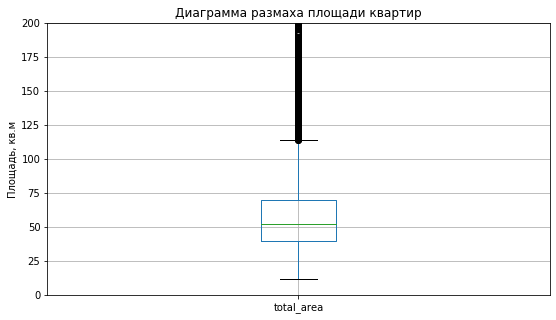

In [26]:
plt.figure(figsize=(9, 5))
plt.ylim(0, 200)
plt.ylabel('Площадь, кв.м')
plt.title('Диаграмма размаха площади квартир')
data.boxplot('total_area')

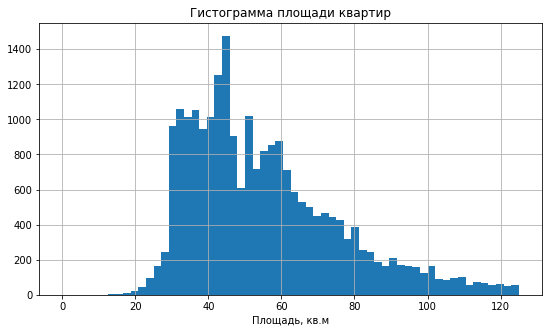

In [27]:
data.hist('total_area', range=(0,125), bins=60, figsize=(9, 5))
plt.xlabel('Площадь, кв.м')
plt.title('Гистограмма площади квартир')
plt.show()

Среди всех объявлений имеются объявления с крайне большой общей площадью, однако их немного, поэтому на среднее значение они влияют не сильно. В основном квартиры имеют площадь от 30 до 60 квадратных метров.  
Значения столбца total_area имеют распределение, близкое к нормальному. Выпадающие значения можно объяснить тем, что квартиры, как правило, типовые. И квартир с определенной типовой площадью может быть необычно много.
Но в целом картина логичная: квартир с очень маленькой или очень большой площадью мало, а квартир средней площади горадо больше.

Изучим цену квартир.

In [28]:
data['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Бросается в глаза то, что среднее значение почти в полтора раза больше медианы. Квартиры с крайне высокой стоимость сильно влияют на среднее значение.

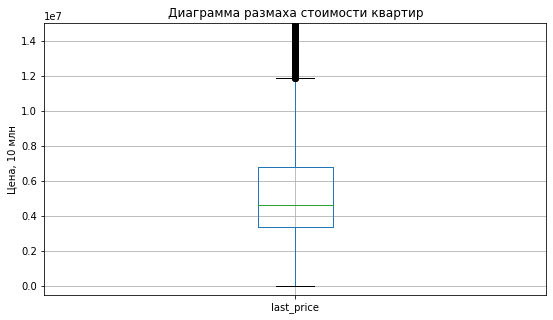

In [29]:
plt.figure(figsize=(9, 5))
plt.ylim(-500000, 15000000)
plt.ylabel('Цена, 10 млн')
plt.xlabel('')
plt.title('Диаграмма размаха стоимости квартир')
data.boxplot('last_price')
plt.show()

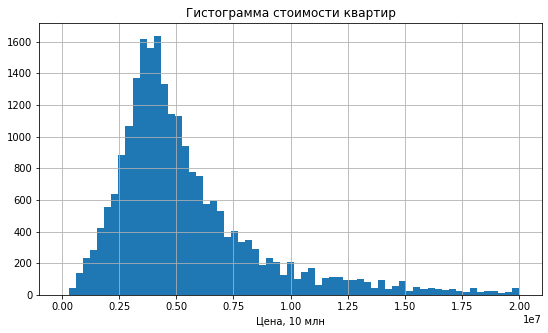

In [30]:
data.hist('last_price', range=(0,20000000), bins=65, figsize=(9, 5))
plt.xlabel('Цена, 10 млн')
plt.title('Гистограмма стоимости квартир')
plt.show()

Цены квартир имеют практически идеальное нормальное распределение. У данной гистограммы был бы длинный "хвост", если бы не был задан параметр range. Всему виной определенное количество объявлений с высокой стоимостью (вплоть до 763 000 000):

In [31]:
expensive_count = data.loc[data['last_price'] > 20000000, 'last_price'].count()
print(f'Количество объявлений со стоимость квартиры более 20 000 000: {expensive_count}')

Количество объявлений со стоимость квартиры более 20 000 000: 704


Однако подозрение вызывают не слишком дорогие квартиры, а слишком дешевые. Минимальная цена квартиры - всего 12 190.

Рассмотрим количество комнат в квартирах.

In [32]:
data['rooms'].describe()

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

На этот раз среднее значение и медиана почти равны.

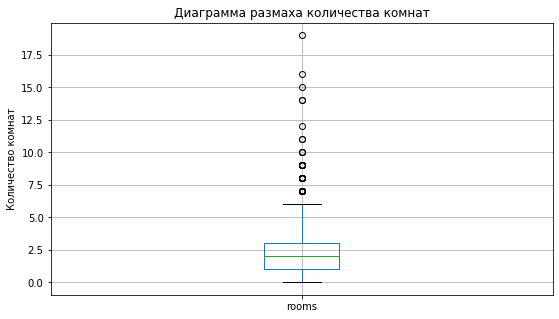

In [33]:
plt.figure(figsize=(9, 5))
plt.ylabel('Количество комнат')
plt.xlabel('')
plt.title('Диаграмма размаха количества комнат')
data.boxplot('rooms')
plt.show()

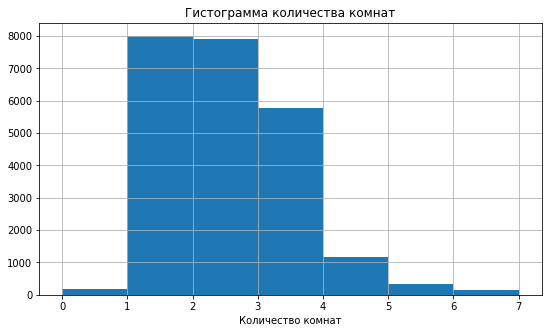

In [34]:
data.hist('rooms', range=(0, 7), bins=7, figsize=(9, 5))
plt.xlabel('Количество комнат')
plt.title('Гистограмма количества комнат')
plt.show()

Число комнат, большее 6 - выбросы, но таких не много. Подозрительны квартиры с нулём комнат. 
Основное количество квартир имеют 1, 2 или 3 комнаты, что выглядит правдивым.

Обратим внимание на высоту потолков.

In [35]:
data['ceiling_height'].describe()

count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Крайние значения выглядят подозрительно. Вряд-ли существуют квартиры с высотой потолков 1 или 100 метров.

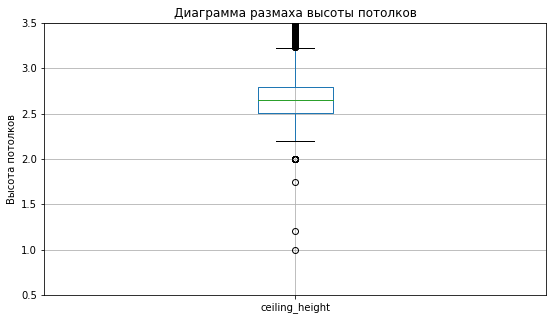

In [36]:
plt.figure(figsize=(9, 5))
plt.ylabel('Высота потолков')
plt.xlabel('')
plt.title('Диаграмма размаха высоты потолков')
plt.ylim(0.5, 3.5)
data.boxplot('ceiling_height')
plt.show()

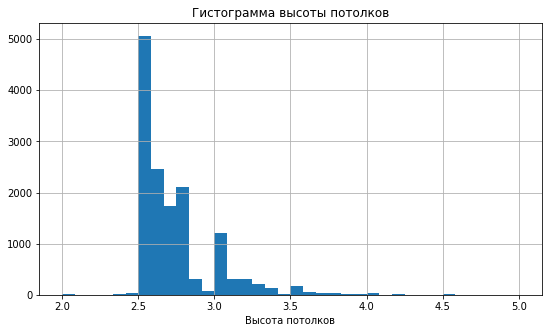

In [37]:
data.hist('ceiling_height', bins=36, range=(2, 5), figsize=(9, 5))
plt.xlabel('Высота потолков')
plt.title('Гистограмма высоты потолков')
plt.show()

Значения в столбце ceiling_height не имеют нормального распределения и это логично. Дома строятся по определенному плану, и каждый план имеет определенную высоту потолка. Поэтому отдельные столбцы в данной диаграмме показывают преобладание домов определенного типа. В нашем случае больше всего домов с высотой потолков 2.5 - 2.6 метра.

#### Изучение времени продажи квартир

Построим гистограмму.

In [38]:
data['days_exposition'].describe()

count    23565.000000
mean       185.759728
std        233.492930
min          0.000000
25%         43.000000
50%         94.000000
75%        237.000000
max       1618.000000
Name: days_exposition, dtype: float64

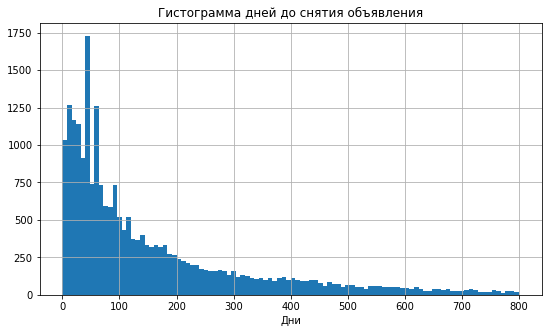

In [39]:
data['days_exposition'].hist(range=(0, 800), bins=100, figsize=(9, 5))
plt.xlabel('Дни')
plt.title('Гистограмма дней до снятия объявления')
plt.show()

Смущают отдельные столбцы, которые показывают, что отдельные значения встречаются слишком часто. Посмотрим на то, какие значения встречаются в столбце days_exposition.

In [40]:
data['days_exposition'].value_counts().head(5)

45    907
60    559
7     269
30    230
4     210
Name: days_exposition, dtype: int64

В топ-5 самый частых значений входят значения 30, 45, 60 и 90. Возникает подозрение, что система, собирающая эти данные, относит каждое значение к одному из диапазонов 0-15, 15-30 и так далее.  

Посчитаем среднее значение и медиану.

In [41]:
mean = data['days_exposition'].mean()
print(f'Среднее значение: {mean}')

Среднее значение: 185.7597284107787


In [42]:
median = data['days_exposition'].median()
print(f'Медиана: {median}')

Медиана: 94.0


Среднее значение почти в 2 раза больше медианы! Сказывается влияние длинного "хвоста" гистограммы - некоторого количества квартир, которые продавались крайне долго. Можно сделать вывод, что обычно квартиры продаются за 100 дней.

Определим пороги, определяющие то, какие квартиры продались очень быстро, а какие очень долго. Для этого заново построим гистограмму, но с меньшим количеством корзин и без параметра range.

In [43]:
data['days_exposition'].describe()

count    23565.000000
mean       185.759728
std        233.492930
min          0.000000
25%         43.000000
50%         94.000000
75%        237.000000
max       1618.000000
Name: days_exposition, dtype: float64

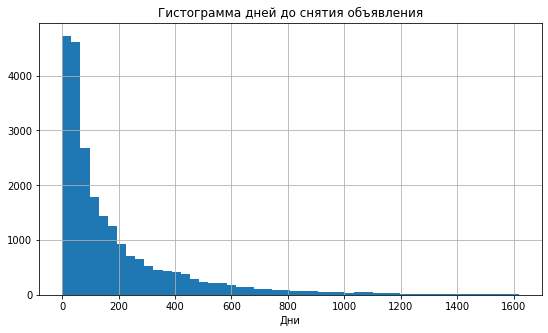

In [44]:
data['days_exposition'].hist(bins=50, figsize=(9, 5))
plt.xlabel('Дни')
plt.title('Гистограмма дней до снятия объявления')
plt.show()

Резкий скачок вниз происходит примерно после 60, поэтому будем считать, что очень быстро продались те квартиры, которые продавались менее 60 дней. Далее столбцы уменьшаются более-менее равномерно, но после 430 происходит еще один скачок вниз. Будем считать, что крайне долго продавались те квартиры, которые продавались более 430 дней.

##### Вывод

Вполне логично, что преобладают "средние" квартиры - квартиры со средней площадью (30 - 60 кв. м.), ценой около 3 млн., с количеством комнат от 1 до 3 и стандартной высотой потолка в 2.5 м.  
Квартиры в среднем продаются за 100 дней. Квартиры, которые продались быстрее, чем за 60 дней, продались очень быстро, а те, которые продавались более 430 дней - крайне долго.

#### Обработка редких и выбивающихся значений

Первое, на что обратим внимание - слишком маленькая цена квартиры. Сложно себе представить квартиру в Санкт-Петербурге стоимость менее 500 000. Посмотрим на эти квартиры и на их расположение.

In [45]:
data.loc[data['last_price'] <= 500000,'locality_name']

2097                    деревня Чудской Бор
4405                                 Сланцы
5698             городской посёлок Будогощь
6859                     деревня Старополье
8793                        Санкт-Петербург
9581                     деревня Старополье
10782                                Сланцы
14295    поселок городского типа Никольский
14904                           деревня Бор
14911                 посёлок станции Свирь
16032                                Сланцы
16219                  деревня Вахнова Кара
16274                    деревня Старополье
17456                                Сланцы
17676                     деревня Ям-Тесово
18867                      деревня Выскатка
21912                     поселок Совхозный
23484                                Сланцы
Name: locality_name, dtype: object

Таких квартиры немного и все, за исключением одной, находятся не в Санкт-Петербурге. Если зайти на сайт Яндекс.Недвижимость, установить фильтр цены до 500 000 и посмотреть на карту в Ленинградской области, то можно найти подтверждение информации выше.  
Дешевые квартиры (до 500 000) встречаются в мелких населенных пунктах Ленинградской области, а в Санкт-Петербурге квартиры начинаются от 1 000 000.  

Поэтому эта квартира - аномалия, которую необходимо удалить.

In [46]:
data.drop(8793, inplace=True)

При анализе показателей сложилось впечатление, что в датасете есть определенное количество объявлений о продаже супер-элитного жилья - крайне дорогих пентхаусов с большой площадью. Они выбиваются из картины, когда речь идет об анализе объявлений о продаже квартир. Возможно, анализ объявлений о продаже элитного жилья - отдельная задача.  
Возьмем срез с квартирами стоимостью до 50 000 000 и площадью до 130 квадратных метров.

In [47]:
good_data = data[(data['last_price'] <= 50000000) & (data['total_area'] <= 130)]

Таким образом автоматически отбросились квартиры с крайне большим количеством комнат.

In [48]:
good_data['rooms'].describe()

count    22720.000000
mean         1.976673
std          0.924493
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

Исключим из среза квартиры с аномальной высотой потолка (> 5 м)

In [49]:
good_data = good_data[(good_data['ceiling_height'] <= 5) | (good_data['ceiling_height'].isna())]

В срез, с которым будем в дальнейшем работать включил только квартиры стоимость до 50 000 000, площадью до 130 квадратных метров и высотой потолков до 5 метров.

Проверим данные на наличие дубликатов.

In [50]:
data.duplicated().sum()

0

Полных дубликатов не найдено.

In [51]:
print(f'Срез включил в себя {good_data.shape[0] / data.shape[0]:.2%} строк от исходного датасета')

Срез включил в себя 96.29% строк от исходного датасета


##### Вывод

Первое, что было обнаружено - это наличие очень дешевых квартир (стоимость менее 500 000). Однако только одна из них находится в Санкт-Петербурге и именно эта квартира имеет совершенно нереальную стоимость 12 000. А остальные квартиры всё равно дороже 400 000, да и находятся они в мелких населенных пунктах, поэтому их цена вполне реальна. Супер-дешевая квартира из Санкт-Петербурга была удалена.  

В исходном датасете присутствовало определенное число очень дорогих и больших квартир. Как правило такие квартиры еще и имели большое число комнат.
Было решено взять срез данных, в который вошли квартиры стоимостью до 50 000 000, площадью до 130 квадратных метров и высотой потолков до 5 метров. Максимальное число комнат в таких квартирах - 7. 
Возможно, исследование предложений среди пентхаусов - отдельный кейс, но сейчас они нам мешали. 

Срез, с которым будет идти дальнейшая работа включил 96.29% исходных данных.  

На предыдущем этапе были обнаружено, что максимальная высота потолков в квартирах указана 100 метров. Это явно ошибочные данные, которые были отфильтрованы. **Предложение**: установить близкий к реальному возможному значению лимит при указании высоты потолков, например 5 метров. И дать возможность пользователю выбрать "Больше 5".  
Также было бы хорошо добавить функции грубой проверки реальности введенных пользователем данных. Например, если общая площадь указана 50 кв. м., то очевидно, что в такой квартире вряд-ли может быть больше 4-5 комнат.

#### Влияние факторов на цену квартиры

Список факторов, влияние которых на цену, нам интересно:
- total_area
- rooms
- city_centers_nearest
- floor_type

Построим диаграммы рессеяния для оценки влияния каждого параметра на цену. Также посмотрим на коэффициенты корреляции.

Исследуем зависимость цены квартиры от площади.

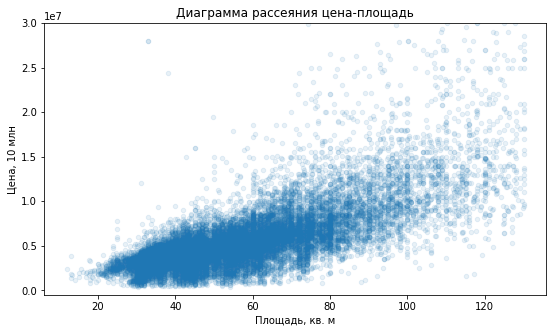

In [52]:
good_data.plot(kind='scatter', x='total_area', y='last_price', ylim=(-500000, 30000000), alpha=0.1, figsize=(9, 5))
plt.xlabel('Площадь, кв. м')
plt.ylabel('Цена, 10 млн')
plt.title('Диаграмма рассеяния цена-площадь')
plt.show()

С увеличением площади увеличивается стоимость квартиры. Логично. Однако существуют и нестандартные квартиры - очень большие, но дешевые или маленькие, но дорогие.

Исследуем зависимость цены от количества комнат.

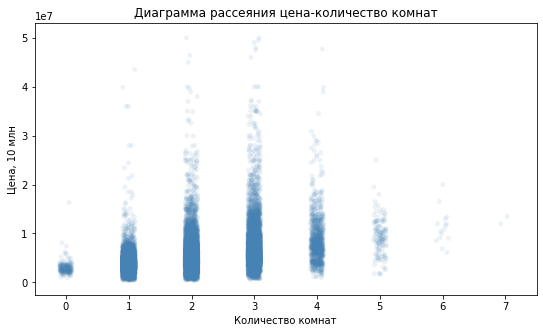

In [53]:
plt.figure(figsize=(9, 5))
sns.stripplot(x="rooms", y="last_price", data=good_data, alpha=.1, color='steelblue')
plt.xlabel('Количество комнат')
plt.ylabel('Цена, 10 млн')
plt.title('Диаграмма рассеяния цена-количество комнат')
plt.show()

По диаграмме видно, что от количества комнат цена зависит не так сильно, однако всё равно видна зависимость: чем больше комнат, тем дороже квартира.

Исследуем зависимость цены от удалённости от центра.

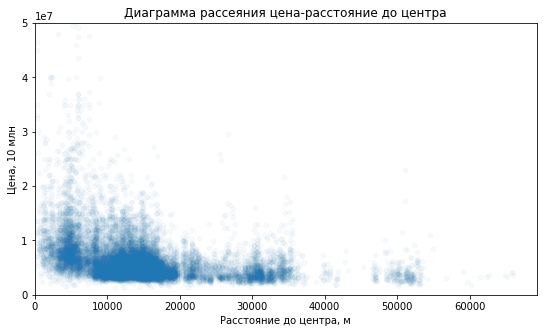

In [54]:
good_data.plot(kind='scatter', x='city_centers_nearest', y='last_price', xlim=0, ylim=(0, 50000000), alpha=0.03, figsize=(9, 5))
plt.xlabel('Расстояние до центра, м')
plt.ylabel('Цена, 10 млн')
plt.title('Диаграмма рассеяния цена-расстояние до центра')
plt.show()

Наблюдается небольшое влияние. С увеличением расстояния до центра города цена падает не сильно.  
Скопления точек в районе 30-ти и 50-ти километровой удаленности от центра - это, скорее всего, более менее крупные населенные пункты, в которых много объявлений о продаже квартиры

Исследуем зависимость цены квартиры от этажа, на котором находится эта квартира.

In [55]:
good_data.pivot_table(index='floor_type', values='last_price', aggfunc='mean').sort_values(by='last_price').style.format("{:.2f}")

,last_price
floor_type,
первый,4415198.15
последний,5111514.54
другой,5743079.94


Квартиры на первых этажах в среднем дешевле, чем квартиры на остальных этажах. Квартиры на последних этажах - самые дорогие.  

In [56]:
print('Таблица корреляции параметра last_price с параметрами total_area, rooms и city_center_nearest')
corr_table = pd.DataFrame(
    good_data.loc[:, ['last_price', 'total_area', 'rooms', 'city_centers_nearest']]
    .corr()['last_price']
).reset_index().loc[1:3]
corr_table.set_axis(['param', 'last_index'], axis='columns', inplace=True)
corr_table

Таблица корреляции параметра last_price с параметрами total_area, rooms и city_center_nearest


,param,last_index
1,total_area,0.711224
2,rooms,0.406573
3,city_centers_nearest,-0.334822


Данная таблица корреляции подтверждает анализы диаграмм рассеяния.
- Общая площадь квартиры достаточно сильно влияет на цену
- Количество комнат и удаленность от центра города влияют слабо

Изучим влияние даты размещения объявления на стоимость квартиры. Отдельно рассмотрим день недели, месяц и год.

Начнем с рассмотрения дня недели.

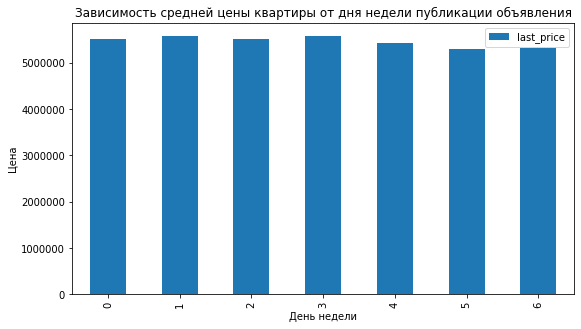

In [57]:
good_data.pivot_table(index='exposition_week_day', values='last_price').plot(kind='bar', figsize=(9, 5))
plt.xlabel('День недели')
plt.ylabel('Цена')
plt.title('Зависимость средней цены квартиры от дня недели публикации объявления')
plt.show()

Влияния дня недели размещения объявления на цену квартиры не обнаружено.

Рассмотрим влияние месяца на цену.

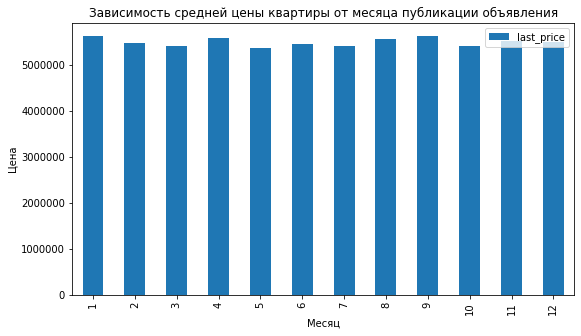

In [58]:
good_data.pivot_table(index='exposition_month', values='last_price').plot(kind='bar', figsize=(9, 5))
plt.xlabel('Месяц')
plt.ylabel('Цена')
plt.title('Зависимость средней цены квартиры от месяца публикации объявления')
plt.show()

Влияния месяца размещения объявления на цену квартиры не обнаружено.

Рассмотрим влияние года на цену.

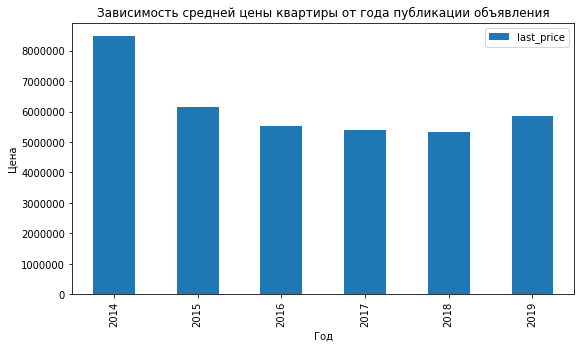

In [59]:
good_data.pivot_table(index='exposition_year', values='last_price', aggfunc='mean').plot(kind='bar', figsize=(9, 5))
plt.xlabel('Год')
plt.ylabel('Цена')
plt.title('Зависимость средней цены квартиры от года публикации объявления')
plt.show()

В 2014 и 2015 наблюдается резкое снижение средней стоимости квартиры. С 2016 по 2019 год цена немного колебалась, но оставалась на одном уровне.

Мы уже установили, что цена сильно зависит от общей площади квартиры. Посмотрим как менялась средняя площадь продаваемых квартир по годам.

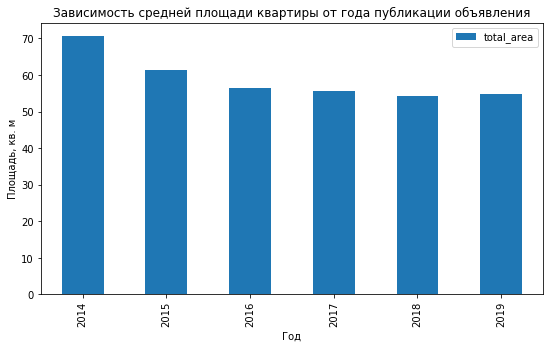

In [60]:
good_data.pivot_table(index='exposition_year', values='total_area', aggfunc='mean').plot(kind='bar', figsize=(9, 5))
plt.xlabel('Год')
plt.ylabel('Площадь, кв. м')
plt.title('Зависимость средней площади квартиры от года публикации объявления')
plt.show()

Диаграммы очень похоже, можно было бы сделать вывод, что снижение стоимости квартир обусловлено снижением средней площади квартир.  
Построим диаграмму, отображающую среднюю стоимость квадратного метра в каждый год.

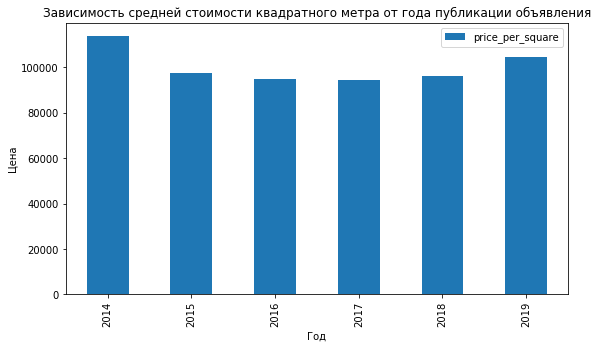

In [61]:
good_data.pivot_table(index='exposition_year', values='price_per_square', aggfunc='mean').plot(kind='bar', figsize=(9, 5))
plt.xlabel('Год')
plt.ylabel('Цена')
plt.title('Зависимость средней стоимости квадратного метра от года публикации объявления')
plt.show()

Данная диаграмма опровергает предположение, сделанное выше. Действительно, с 2014 по 2018 наблюдается снижение стоимости квартир, а в 2019 наблюдается небольшой рост.

##### Вывод  

Цена квартиры сильно зависит от следующих параметров:
- Общая площадь квартиры  

Слабо зависит от:
- Количество комнат
- Удаленность от центра города  

Не зависит от:
- Дня недели, в который было размещено объявление
- Месяца, в который было размещено объявление  

Замечена тенденция снижения стоимости квартиры с 2014 года по 2018 год; в 2019 году наблюдается небольшой рост.  
Также обнаружено, что на первом этаже самые дешевые квартиры, на последнем - самые дорогие. 

#### Рассчет стоимости жилья в разных населенных пунктах

Выведем список 10-ти населенных пунктов с самым большим количеством объявлений.

In [62]:
print('Топ-10 населенных пунктов по количеству объявлений')
top_10_locality = good_data['locality_name'].value_counts().head(10)
top_10_locality

Топ-10 населенных пунктов по количеству объявлений


Санкт-Петербург      14838
посёлок Мурино         518
посёлок Шушары         439
Всеволожск             397
Пушкин                 354
Колпино                337
посёлок Парголово      326
Гатчина                303
деревня Кудрово        299
Выборг                 233
Name: locality_name, dtype: int64

Рассчитаем среднюю стоимость квадратного метра в квартирах в этих населенных пунктах.

In [63]:
top_10_locality = good_data['locality_name'].value_counts().head(10).index
top_10_locality_data = good_data.loc[good_data['locality_name'].isin(top_10_locality)]
top_10_price_per_square_mean = top_10_locality_data['price_per_square'].mean()
print(f'Средняя стоимость квадратного метра населенных пунктах из топ 10: {top_10_price_per_square_mean:.2f}')

Средняя стоимость квадратного метра населенных пунктах из топ 10: 105951.48


Найдем населенные пункты с самыми дорогими и самыми дешевыми квартирами.

In [64]:
locality_with_min_price = top_10_locality_data.loc[
    top_10_locality_data['price_per_square'] == top_10_locality_data['price_per_square'].min(), 
    'locality_name'
].values[0]

locality_with_max_price = top_10_locality_data.loc[
    top_10_locality_data['price_per_square'] == top_10_locality_data['price_per_square'].max(), 
    'locality_name'
].values[0]

In [65]:
print(f'Населенный пункт с самой низкой стоимостью жилья: {locality_with_min_price:}')

Населенный пункт с самой низкой стоимостью жилья: Гатчина


In [66]:
print(f'Населенный пункт с самой низкой стоимостью жилья: {locality_with_max_price:}')

Населенный пункт с самой низкой стоимостью жилья: Санкт-Петербург


##### Вывод

Самое дорогое жилье в Санкт-Петербурге, а самое дешевое в Гатчине.

#### Определение радиуса центральной зоны Санкт-Петербурга

Возьмем срез, в который войдут только квартиры, находящиеся в Санкт-Петербурге. Создадим столбец с округленным до километров расстоянием до центра.

In [67]:
spb_locality = good_data.loc[data['locality_name'] == 'Санкт-Петербург'].copy()
spb_locality['city_center_rounded'] = (spb_locality['city_centers_nearest'] / 1000).round()

Посчитаем среднюю стоимость квартиры для каждого километра удаленности от центра.

In [68]:
price_per_kilometer = spb_locality.pivot_table(index='city_center_rounded', values='last_price')
price_per_kilometer.head(5).style.format('{:.2f}')

,last_price
city_center_rounded,
0.0,19599034.89
1.0,11058421.05
2.0,10889229.51
3.0,8900153.74
4.0,9507221.96


Построим график, показывающий зависимость средней цены квартиры от расстояния до центра Санкт-Петербурга.

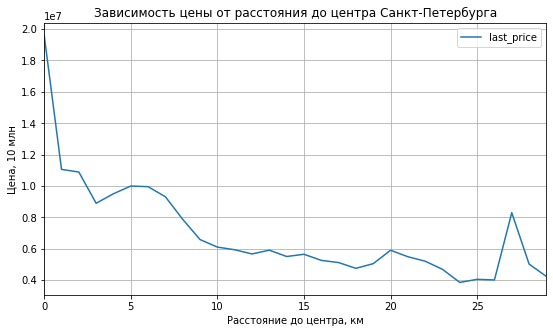

In [69]:
price_per_kilometer.plot(grid='True', figsize=(9, 5))
plt.title('Зависимость цены от расстояния до центра Санкт-Петербурга')
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Цена, 10 млн')
plt.show()

##### Вывод

Цена стремительно бывает на диапазоне от 0 до 3 км, а далее даже наблюдается небольшой рост цены.  
Центральную зону можно считать окружностью с радиусом в 3 км.

#### Изучение предложений в центре Санкт-Петербурга

Возьмем срез, включающий предложения в центре Санкт-Петербурга (удаленность от центра <= 3км).

In [70]:
spb_center = spb_locality[spb_locality['city_center_rounded'] <= 3]

Построим диаграммы для следующих параметров:
- total_area
- last_price
- rooms
- ceiling_height  

Так как необходимо сравнить получившиеся диаграммы с диаграммами, построенными ранее, то построим их попарно на одном графике.

Сравним гистограммы площади квартиры.

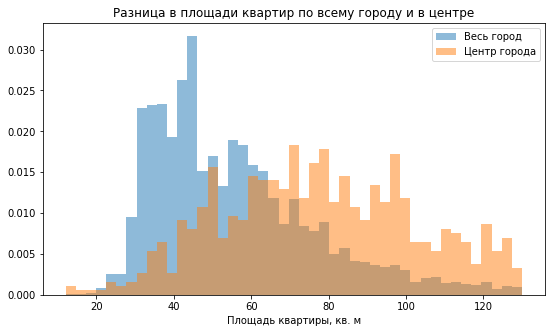

In [71]:
plt.figure(figsize=(9, 5))
_, bins, _ = plt.hist(good_data['total_area'], bins=45, alpha=0.5, density=True, label='Весь город')
plt.hist(spb_center['total_area'], bins=bins, alpha=0.5, density=True, label='Центр города')
plt.legend()
plt.xlabel('Площадь квартиры, кв. м')
plt.title('Разница в площади квартир по всему городу и в центре')
plt.show()

In [72]:
print(f'Средняя площадь квартиры в центре в {spb_center["total_area"].mean() / good_data["total_area"].mean():.2f} раза больше, чем средняя площадь квартиры в городе.')

Средняя площадь квартиры в центре в 1.40 раза больше, чем средняя площадь квартиры в городе.


Стоит отметить, что в центре площади квартир распределены более равномерно, то есть нету пика.

Сравним гистрограммы стоимостей квартир.

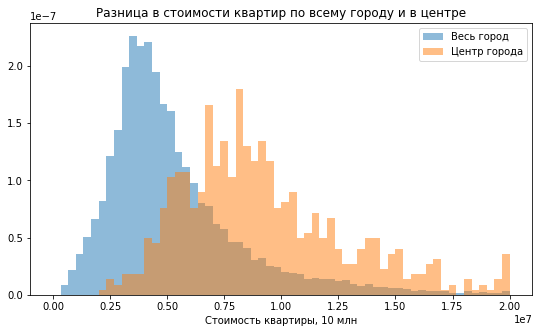

In [73]:
plt.figure(figsize=(9, 5))
_, bins, _ = plt.hist(good_data['last_price'], range=(0, 20000000), bins=60, alpha=0.5, density=True, label='Весь город')
plt.hist(spb_center['last_price'], bins=bins, alpha=0.5, density=True, label='Центр города')
plt.legend()
plt.xlabel('Стоимость квартиры, 10 млн')
plt.title('Разница в стоимости квартир по всему городу и в центре')
plt.show()

In [74]:
print(f'Средняя цена квартиры в центре в {spb_center["last_price"].mean() / good_data["last_price"].mean():.2f} раза больше, чем средняя цена квартиры в городе.')

Средняя цена квартиры в центре в 1.88 раза больше, чем средняя цена квартиры в городе.


Сравним гистограммы количества комнат

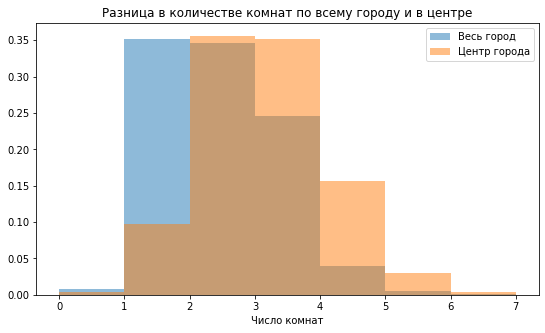

In [75]:
plt.figure(figsize=(9, 5))
_, bins, _ = plt.hist(good_data['rooms'],bins=7, alpha=0.5, density=True, label='Весь город')
plt.hist(spb_center['rooms'], bins=bins, alpha=0.5, density=True, label='Центр города')
plt.legend()
plt.xlabel('Число комнат')
plt.title('Разница в количестве комнат по всему городу и в центре')
plt.show()

В центре квартиры в среднем имеют больше комнат.

In [76]:
print(f'Среднее количество комнат в центре в {spb_center["rooms"].mean() / good_data["rooms"].mean():.2f} раза больше, чем среднее количество комнат в городе.')

Среднее количество комнат в центре в 1.35 раза больше, чем среднее количество комнат в городе.


В центре Санкт-Петербурга много старых домов, так называемых "сталинок", квартиры в которых имеют высокие потолки, большую площадь и много комнат. В новостройках и "хрущовках" таких квартир практически нет.

Сравним гистограммы высоты потолков

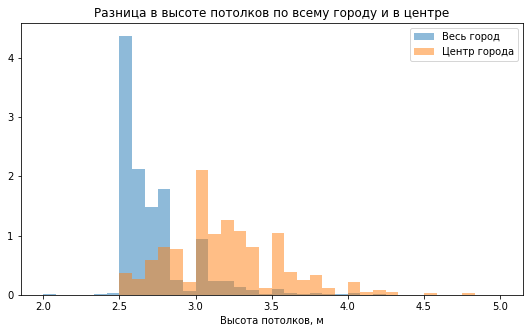

In [77]:
plt.figure(figsize=(9, 5))
_, bins, _ = plt.hist(good_data['ceiling_height'],bins=36, range=(2,5), alpha=0.5, density=True, label='Весь город')
plt.hist(spb_center['ceiling_height'], bins=bins, alpha=0.5, density=True, label='Центр города')
plt.legend()
plt.xlabel('Высота потолков, м')
plt.title('Разница в высоте потолков по всему городу и в центре')
plt.show()

In [78]:
print(f'Средняя высота потолков в центре в {spb_center["ceiling_height"].mean() / good_data["ceiling_height"].mean():.2f} раза больше, чем средняя высота потолков в городе.')

Средняя высота потолков в центре в 1.18 раза больше, чем средняя высота потолков в городе.


##### Вывод  

В центре квартиры в среднем почти в 2 раза дороже, чем в среднем по городу. Связано это прежде всего с тем, что центральная зона города сама по себе добавляет стоимости квартирам. Кроме того, в центре квартиры имеют в среднем большую площадь, большее количество комнат и большую высоту потолков. Это также делает квартиры из центральной зоны более дорогими.

#### Оценка влияния различных параметров на стоимость квартир центральной зоны

Оценим влияние следующих параметров:
- rooms
- floor_type
- city_centers_nearest
- first_day_exposition

Построим таблицу корреляции параметра last_price с параметрами total_area, rooms и city_centers_nearest

In [79]:
corr_table = pd.DataFrame(
    spb_center.loc[:, ['last_price',  'total_area', 'rooms', 'city_centers_nearest']]
    .corr()['last_price']
).reset_index().loc[1:3]
corr_table.set_axis(['param', 'last_index'], axis='columns', inplace=True)
corr_table

,param,last_index
1,total_area,0.487569
2,rooms,0.188587
3,city_centers_nearest,-0.202032


Коэффициенты корреляции стали ближе к нулю, то есть в центральной части города влияние общей площади, количества комнат и удаленность от центра ниже, чем в среднем по всему городу.  
Это объясняется, опять же, тем, что в центре много старых домов, в которых параметры квартир имеют более равномерное распределение.

Исследуем зависимость цены от этажа.

In [80]:
spb_center.pivot_table(index='floor_type', values='last_price', aggfunc='mean').sort_values(by='last_price').style.format("{:.2f}")

,last_price
floor_type,
первый,7870595.61
последний,9995402.15
другой,11118354.76


Наблюдается изменение относительно общей по городу картины: самые дорогие квартиры находятся не на первом и не на последнем этаже.

Исследуем влияния дня, месяца и года публикации объявления на стоимость квартиры.

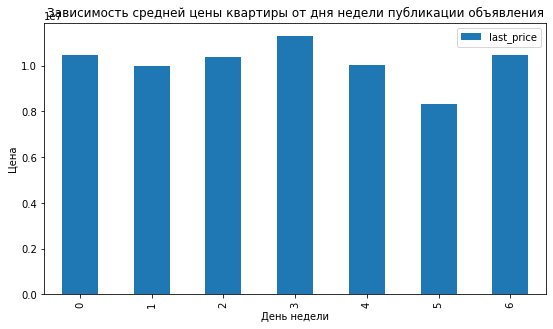

In [81]:
spb_center.pivot_table(index='exposition_week_day', values='last_price', aggfunc='mean').plot(kind='bar', figsize=(9, 5))
plt.xlabel('День недели')
plt.ylabel('Цена')
plt.title('Зависимость средней цены квартиры от дня недели публикации объявления')
plt.show()

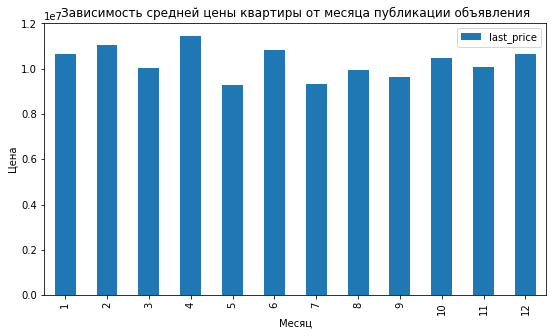

In [82]:
spb_center.pivot_table(index='exposition_month', values='last_price', aggfunc='mean').plot(kind='bar', figsize=(9, 5))
plt.xlabel('Месяц')
plt.ylabel('Цена')
plt.title('Зависимость средней цены квартиры от месяца публикации объявления')
plt.show()

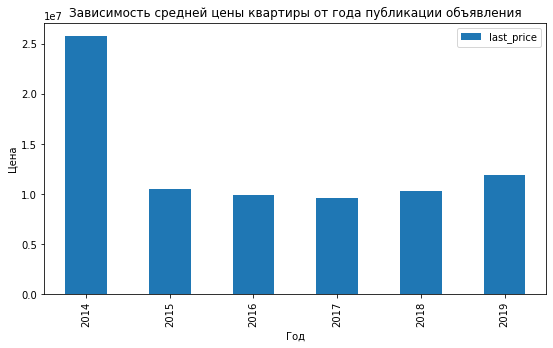

In [83]:
spb_center.pivot_table(index='exposition_year', values='last_price', aggfunc='mean').plot(kind='bar', figsize=(9, 5))
plt.xlabel('Год')
plt.ylabel('Цена')
plt.title('Зависимость средней цены квартиры от года публикации объявления')
plt.show()

Самый большой интерес вызывает диаграмма влияния года публикации объявления на цену квартиры. В центральной зоне квартиры резко подешевели почти в 2 раза после 2014 года.  
Однако, если мы посмотрим на количества объявлений, опубликованных в этих годах, то увидим, что в 2014 было опубликовано всего 5 объявлений, а в 2015 уже 64.  
Поэтому для создания вывода слишком маленькая выборка.

In [84]:
spb_center[spb_center['exposition_year'] == 2014].shape[0]

5

In [85]:
spb_center[spb_center['exposition_year'] == 2015].shape[0]

64

##### Вывод

В центральной зоне влияние общей площади, количества комнат и удаленность от центра ниже, чем в среднем по всему городу. Это обуславливается тем, что в центре города параметры квартир имеют более равномерное распределение.  
Было обнаружено, что квартиры, расположенные на последнем этаже, в среднем не самые дорогие, хотя именно это в среднем наблюдается по всему городу. Но квартиры на первых этажах по-прежнему дешевле остальных.  
Влияния дня недели или месяца публикации объявления на цену не обнаружено, однако можно отметить, что в субботу публикуются более дешевые объявления. На диаграмме влияния года публикации объявления на цену квартиры обнаружена особенность: квартиры, объявления о продаже которых, были опубликованы в 2014 году, заметно дороже остальных квартир. Но данных в выборке оказалось слишком мало, для составления вывода. Требуются дополнительные сведения о квартирах, продаваемых в центре Санкт-Петербурга в 2014 году.

### Общий вывод

Кратко о проделанной работе:
1. Предобработка данных:
    - Были обработаны пропуски в столбцах living_area, is_apartment, kitchen_area, balcony, days_exposition
    - Проведена замена типов в столбцах last_price, floors_total, days_exposition, balcony, first_day_exposition, is_apartment
2. Рассчитаны и добавлены дополнительные параметры:
    - Цена квадратного метра (price_per_square)
    - День недели, месяц и год публицкации объявления (exposition_week_day, exposition_month, exposition_year)
    - Тип этажа (floor_type)
    - Соотношение жилой площади и общей площади (living_area_part)
    - Соотношение площади кухни и общей площади (kitchen_area_part)
3. Исследованы основные параметры (площадь, стоимость, высота потолков, количество комнат, дата размещения объявления)
4. Исследовано влияние различных параметров на цену квартиры
5. Исследованы квартиры из центральной зоны Санкт-Петербурга

Рекомендации по данным:
- Установить лимитные значения для параметров ceiling_height, floors_total
- Добавить систему проверки "адекватности" введенных данных
- Устранить причину пропусков в столбце locality_name. Населенный пункт, в котором находится квартира - чуть ли не важнейший параметр
- Рассмотреть возможность уменьшения количества необязательных для заполнения полей

На основании анализа параметров был взят срез данных, который включает в себя "обычные" квартиры. Исследование крайне дорогих и больших квартир - отдельная задача, которая не входит в данный проект.  

В ходе анализа среди всех квартир были выделены квартиры, которые находятся в центральной зоне Санкт-Петербурга.

В среднем по всему городу и в среднем по центру Санкт-Петербурга было выявлено, что на цену квартиры больше всего влияет общая площадь; количество комнат и удаленность от центра влияют не так сильно. При чём в центре влияние всех этих параметров ниже, чем в среднем по городу. Также стоить отметить, что в среднем по городу самые дороги квартиры находятся на последнем этаже, а в центре - между первым и последним. В обоих случаях квартиры на первом этаже в среднем дешевле квартир на остальных этажах.  

Квартиры в центральной зоне оказались в среднем почти в 2 раза дороже квартир по всему городу. Помимо этого, квартиры в центре в полтора раза больше по площади, с б*о*льшим количеством комнат и с более высокими потолками. Эта разница в параметрах, а так же статус центральной зоны города и повлияли на цену.  

Влияние дня недели или месяца публикации объявления на цену не обнаружено. Однако с 2014 жилье несколько подешевело. **Возможно** это связано с кризисом, который начался в 2014 году и с ухудшением отношений с западными странами.  

Предложения для создания автоматизированной системы, предназначенной для выявления мошеннической деятельности и аномалий:
- Разбить все объявления на категории (дешевое, среднее, дорогое и элитное жилье)
- Выискавать выпадающие объявления (например дорогое жилье с очень маленькой площадью и далеко от центра)
- Стоит обратить внимание на время, за которое квартира была продана. Среднее время продажи квартиры - 100 дней. Если квартира продается очень быстро, например за пару дней, то это вызывает подозрения



### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод